# To bee or not to bee

## Description:

FIrst pass RNA-seq analysis of bee body bits. Includes a Queen and some other bees.

## Step 1: Pre-processing

Prelim note: run all scripts from the github repo (on fiji, in dir **/Users/ativ2716/repos/beesknees/scripts**).

### 1a) Download files

See email from Ed. Fastq files downloaded into **/Users/CL_Shared/data/atma/beenomics_rna/fastq**

### 1b) Rename files

Annoyingly, the files are all suffixed with _R1_001.fastq.gz instead of _R1.fastq.gz, and _R2_001.fastq.gz instead of _R2.fastq.gz. 

Quick rename can fix that. 

```bash
rename R2_001.fastq.gz R2.fastq.gz *.fastq.gz
rename R1_001.fastq.gz R1.fastq.gz *.fastq.gz
```

### 1c) Fastq quality control

Commit: [fastqReport.q](https://github.com/atmaivancevic/beesknees/blob/c2467b13f1a3023ab3cb16665bb8eb2462e5ae8e/scripts/fastqReport.q)


Command line:
```bash
inDir=/Users/CL_Shared/data/atma/beenomics_rna/fastq outDir=/Users/CL_Shared/data/atma/beenomics_rna/fastq sbatch --array 0-15 fastqReport.q
```
Submitted batch job 1703536

### 1d) Trim adapters 
Look at the fastq quality reports online. Identify the adapter from the overrepresented seqs section (in this case, looks like its TruSeq3-SE.fa).

Trim them out. 

Commit: [trimAdapters_PE.q](https://github.com/atmaivancevic/beesknees/blob/ca4ef76e08969a379135f183e4cd2a424452f6f4/scripts/trimAdapters_PE.q)

Command line:
```bash
mkdir -p /Users/CL_Shared/data/atma/beenomics_rna/trimmed_fastq

adapterFile=/opt/trimmomatic/0.36/adapters/TruSeq3-SE.fa inDir=/Users/CL_Shared/data/atma/beenomics_rna/fastq outDir=/Users/CL_Shared/data/atma/beenomics_rna/trimmed_fastq sbatch --array 0-7 trimAdapters_PE.q 
```
Submitted batch job 1703656

### 1e) Repeat quality control test

Commit: [fastqReport.q](https://github.com/atmaivancevic/beesknees/blob/c2467b13f1a3023ab3cb16665bb8eb2462e5ae8e/scripts/fastqReport.q)

Command line:
```bash
inDir=/Users/CL_Shared/data/atma/beenomics_rna/trimmed_fastq outDir=/Users/CL_Shared/data/atma/beenomics_rna/trimmed_fastq sbatch --array 0-31 fastqReport.q
```
Submitted batch job 1703739

All further steps will use the (paired) trimmed output.

## Step 2: Get reference genome

### 2a) Download the most recent assembly

The representative assembly on NCBI is **Amel_HAv3.1** (released Sept 2018), but [Bee Base](http://hymenopteragenome.org/beebase/) and the [UCSC test browser](https://genome-test.gi.ucsc.edu/cgi-bin/hgTracks?db=apiMel4&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=Group1%3A11957363%2D17936044&hgsid=394152521_Ij6QgJSXzhsDInHbcn4mytY7oEA1) use **Amel_4.5**/**apiMel4** (released Nov 2010). So **Amel_4.5** is probably going to have better annotation and viewing features, but it's also quite old......

Let's download both. By default use the RefSeq assembly (if none available, use GenBank version). Make necessary additional files (e.g. genome.chrom.size, and indexes for hisat2 and bwa).

Commit: [downloadGenome.sh](https://github.com/atmaivancevic/beesknees/blob/faa08fdc8b3767f88be76f38c6d659c9bfc0a0f0/scripts/downloadGenome.sh)

## Step 3: Align reads to reference (try reference Amel_4.5 first)

### 3a) Align reads using hisat2

Commit: [hisat2_PE.q](https://github.com/atmaivancevic/beesknees/blob/0b60d0236d6c9715c12e47cdfef8c8388ba20ca1/scripts/hisat2_PE.q)

Command line:
```bash
inDir=/Users/CL_Shared/data/atma/beenomics_rna/trimmed_fastq outDir=/Users/CL_Shared/data/atma/beenomics_rna/bam hisatIdxDir=/Users/CL_Shared/db/genomes/Amel_4.5/index/hisat2 hisatIdx=Amel_4.5.main sbatch --array 0-7 hisat2_PE.q
```
Submitted batch job 1705349

## Step 4: RNA-Seq quantification

### 4a) Feature counts

Commit: [featureCounts.q](https://github.com/atmaivancevic/beesknees/blob/04b7d306f3a7d330ac3c08b18b6da47a8be2fd32/scripts/featureCounts.q)

Command line:
```bash
inDir=/Users/CL_Shared/data/atma/beenomics_rna/bam outDir=/Users/CL_Shared/data/atma/beenomics_rna/featureCounts gtfFile=/Users/CL_Shared/db/genomes/Amel_4.5/annotations/Amel_4.5.annotation.gtf feature=exon strandOption=2 sbatch featureCounts.q
```
Submitted batch job 1709862

## Step 5: 


### 3b) Add tracks to fiji hub

Check that **~/hub/hg38/trackDb.txt** exists. It's ok if it already has tracks from other projects; the new ones will simply be appended as a new supertrack.

Script: [hubload.q](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/hubload.q)

Commit: []()

Command line:
```bash
inDir=DUMMY project=DUMMY trackdb=DUMMY sbatch hubload.q
```
Submitted batch job X

### 3c) Sync fiji hub to web server hub

```bash
# anywhere on fiji
hubsync
```

### 3d) Visualize on UCSC

This section is just a reminder to actually look at the tracks.

## Step 4: Differential expression analysis

Make a table of broadpeak regions versus samples, as shown below. Fill it in with the bam read counts in each of those regions. Then look for differentially expressed regions.

|         | Sample1 | Sample2 | Sample3 | ....  |
|---------|---------|---------|---------|-------|
| Region1 |         |         |         |       |
| Region2 |         |         |         |       |
| Region3 |         |         |         |       |
| ...     |         |         |         |       |

### 4a) Merge peaks

Script: [mergePeaks.q](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/mergePeaks.q)

Commit: []()

Command line: 
```bash
inDir=DUMMY projectName=DUMMY sbatch mergePeaks.q
```
Submitted batch job X

### 4b) Sort and index bams

Script: [indexBam.q](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/indexBam.q)

Commit: []()

Command line:
```bash
inDir=DUMMY sbatch --array 0-DUMMY indexBam.q
```
Submitted batch job X

### 4c) Count reads in each region

First, create a text file called **cohen2017_chip_bams.txt**, containing the path and file names of the bams that should appear in the matrix. Put them in a logical order e.g. all controls then all cancer samples. Put the file in [project_files](https://github.com/atmaivancevic/LTR_enrichment/tree/master/chipseq/project_files).

Example: [cohen2017_chip_bams.txt](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/project_files/cohen2017_chip_bams.txt)

Commit: []()

Then run bedtools multicov to count the reads in each region for each bam.

Script: [computeBamCountMatrix.q](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/computeBamCountMatrix.q)

Commit: []()

Command line: 
```bash
projectName=DUMMY bed=DUMMY outDir=DUMMY sbatch computeBamCountMatrix.q
```
Submitted batch job X

Note: this step takes a while.

### 4d) Identify differentially expressed regions

Script: [deseq.R](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/deseq.R)

Commit: []()

Output a MA plot, volcano plot, and two text files:
* **projectName_sigUp.txt**: regions that are significantly upregulated in cancer vs controls
* **projectName_sigDown.txt**: regions that are significantly downregulated in cancer vs controls

Extract the coordinates for these regions.

Example: [getCoordinates.sh](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/getCoordinates.sh)

### 4e) Compare my DE regions to DE regions from paper (if provided)

*Note: Most people still use hg19, remember to [liftover](https://genome.ucsc.edu/cgi-bin/hgLiftOver) all coordinates to hg38.*

Example: [intersectRegions.sh](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/intersectRegions.sh)

## Step 5: Repeat enrichment

### 5a) Giggle search the DE regions

Bgzip bed query files. 

Script: [bgzip.q](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/bgzip.q)

Commit: []()

Command line:
```bash 
inDir=DUMMY sbatch --array 0-DUMMY bgzip.q
```
Submitted batch job X

Then giggle search all the queries.

Script: [giggleSearch.q](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/giggleSearch.q)

Commit: []()

Command line:
```bash
gigIdx=DUMMY inDir=DUMMY outDir=DUMMY sbatch --array 0-DUMMY giggleSearch.q
```
Submitted batch job X

#### List the top ten hits for each file (sorted by giggle score)

### 5b) Giggle search all peak regions from all samples

Use the broadPeak files for each sample, generated by macs2.

Example:
```bash
cd /Users/CL_Shared/data/atma/cohen2017_chip/giggle_queries
cp ../bedgraph/*broadPeak .
rename .broadPeak _broadPeak.bed *.broadPeak # because giggle will only accept .bed.gz files
```

Bgzip.

Script: [bgzip.q](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/bgzip.q)

Search.

Script: [giggleSearch.q](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/giggleSearch.q)

### 5c) Giggle heatmaps

Combine the giggle output from all samples into a matrix filled with giggle combo scores (or pvalue, or fold change).

| Repeat  | Sample1 | Sample2 | Sample3 | ....  |
|---------|---------|---------|---------|-------|
| Eutr5   |         |         |         |       |
| HERV17  |         |         |         |       |
| LTR10   |         |         |         |       |
| ...     |         |         |         |       |

Script: [makeGiggleMatrix.sh](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/makeGiggleMatrix.sh)

Commit: []()

Then make a heatmap.

Script: [clustermap.py](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/clustermap.py)

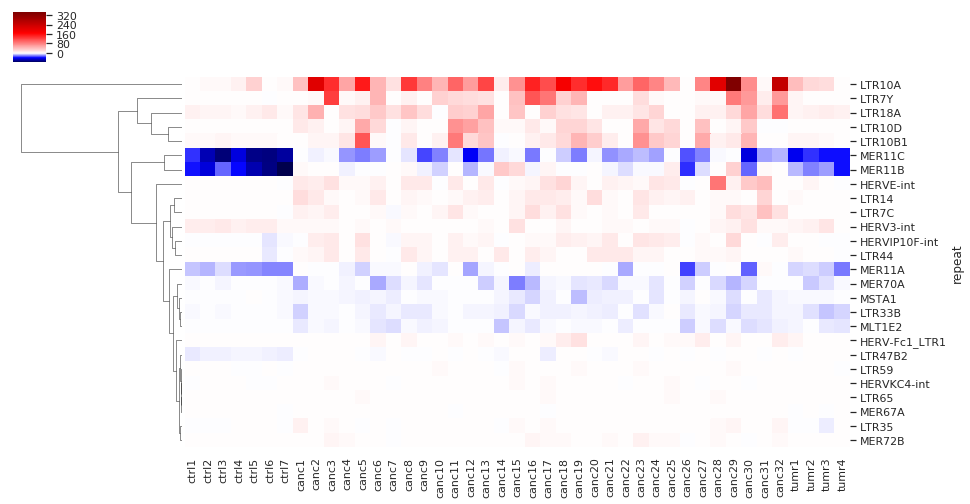

In [4]:
# example heatmap

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import math
from scipy.spatial.distance import pdist,squareform

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# read in giggle table
data = pd.read_table('/Users/CL_Shared/data/atma/cohen2017_chip/giggle_stats/sig_giggleMatrix.tab', sep='\t', index_col=0)
# print(data) 

# make a heatmap with hierarchial clustering
import seaborn as sns; sns.set(color_codes=True)

# choose colour scheme
# copying Ryan's colour scheme from giggle paper
from matplotlib import colors as mcolors
from matplotlib.colors import Normalize

_seismic_data = ( (0.0, 0.0, 0.3), 
                  (0.0, 0.0, 1.0),

                  (1.0, 1.0, 1.0),

                  (1.0, 0.0, 0.0),
                  (0.5, 0.0, 0.0))

hm = mcolors.LinearSegmentedColormap.from_list( \
        name='red_white_blue', \
        colors=_seismic_data, N=256)

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# plot figure
sns.clustermap(data, cmap=hm, norm = MidpointNormalize(midpoint=0), robust=False, metric='euclidean', method='ward', figsize=(15, 8), col_cluster=False)

plt.show()


### 5d) Giggle score boxplots

We can visually inspect the heatmaps and try to see if there's a difference between the control vs cancer samples. Or, we can map the giggle score (or pvalue or fold change) for each sample as points in a boxplot and get R to tell us if there's a significant difference between the groups.

Script: [boxplot.R](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/boxplot.R)

Example: [runBoxplot.sh](https://github.com/atmaivancevic/LTR_enrichment/blob/master/chipseq/scripts/runBoxplot.sh)

Commit: []()

### 5e) Giggle score cutoff

Set numerical thresholds for cancer vs control scores and finding ERVs which satisfy those thresholds. This will hopefully find instances where the ERV is not necessarily enriched in all cancer samples, but is in half or more of the cancer samples.

Either an R or bash script

### 5f) Deeptools heatmap showing genome-wide enrichment

Remember to include the mappability tracks that Ed added to /scratch

## Step 6: Candidate ERVs

All of the above analyses would have narrowed down a subset of "best candidate" ERVs that look like they're acting as enhancers, based on differential expression in cancer vs control.

### 6a) From deeptools heatmap, for each candidate ERV, extract the coordinates which show highest expresion and do a visual sanity check on UCSC

### 6b) Motif analysis

## Step 7: Candidate genes

Check if any of these are thought to be oncogenes: http://ongene.bioinfo-minzhao.org/
## Step 8: Candidate cell lines!
